In [1]:
import os
print(os.path.isdir("Dataset"))


False


In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
import html
import re



In [5]:
# # Configure plots
# sns.set(style="whitegrid")
# %matplotlib inline

# # Load Data
# data_path = "Dataset/Corona_NLP_train.csv"
# df = pd.read_csv(data_path, encoding='ISO-8859-1')  # Use the appropriate encoding
#df = pd.read_csv("C:/Users/נעמה/Desktop/שנה ג סמסטר ב/deep learning/Corona_NLP_train.csv",encoding='ISO-8859-1')


In [ ]:
# upload the dataset
df = pd.read_csv('Corona_NLP_train.csv', encoding='ISO-8859-1')
df

AttributeError: module 'pandas' has no attribute 'raed_csv'

# clean the text 



In [ ]:


# Make sure long strings don't get cut off in the display
pd.set_option('display.max_colwidth', None)

# Load your dataset (use the correct encoding!)
df = pd.read_csv("Corona_NLP_train.csv", encoding='ISO-8859-1')

# Show only the tweet and its sentiment



# Function to clean a single tweet
def clean_text(text):
    # Fix common encoding glitches
    replacements = {
        "Â": "'",      # corrupted apostrophe
        "â€™": "'",     # curly apostrophe
        "â€˜": "'",     # opening apostrophe
        "â€œ": '"',     # opening quote
        "â€": '"',     # closing quote
        "â€“": "-",     # dash
        "â€”": "-",     # em dash
        "Ã¢": "'",      # apostrophe-like corruption
        "Ã©": "é",      # accented e
        "Ã": "à",       # corrupted accented a
        "Â": "",        # stray padding character
        "™": "",        # trademark
        "…": "...",     # ellipsis
    }
    for wrong, right in replacements.items():
        text = text.replace(wrong, right)

    # Decode HTML entities (e.g., &amp; -> &)
    text = html.unescape(text)

    # Standard cleaning steps
    text = text.replace('\r', ' ').replace('\n', ' ')  # remove line breaks
    text = re.sub(r'http\S+|www.\S+', '', text)        # remove URLs
    text = re.sub(r'@\w+', '', text)                   # remove mentions
    text = re.sub(r'#', '', text)                      # remove hashtags
    text = re.sub(r'\s+', ' ', text).strip()           # normalize whitespace

    return text
# Apply cleaning function
df['CleanTweet'] = df['OriginalTweet'].apply(clean_text)
df = df[df['CleanTweet'].str.strip() != '']


df

UserName  ScreenName                      Location     TweetAt  \
0          3799       48751                        London  16-03-2020   
1          3800       48752                            UK  16-03-2020   
2          3801       48753                     Vagabonds  16-03-2020   
3          3802       48754                           NaN  16-03-2020   
4          3803       48755                           NaN  16-03-2020   
...         ...         ...                           ...         ...   
41152     44951       89903  Wellington City, New Zealand  14-04-2020   
41153     44952       89904                           NaN  14-04-2020   
41154     44953       89905                           NaN  14-04-2020   
41155     44954       89906                           NaN  14-04-2020   
41156     44955       89907  i love you so much || he/him  14-04-2020   

                                                                                                                                                                                                                                                                                                                            OriginalTweet  \
0                                                                                                                                                                                                                         @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8   
1                                                                                           advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order   
2                                                                                                                                                                                                     Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P   
3       My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j   
4      Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n   
...                                                                                                                                                                                                                                                                                                                                   ...   
41152                                                                                                                                                                                                                              Airline pilots offering to stock supermarket shelves in #NZ lockdown #COVID-19 https://t.co/cz89uA0HNp   
41153                                                                                                                                                                                          Response to complaint not provided citing COVID-19 related delays. Yet prompt in rejecting policy before consumer TAT is over. Way to go ?   
41154                                                                                                                                

# Exploring the data 
To better understand our dataset, we first explored the text of the tweets. An
initial word cloud revealed that the most frequent words were technical tokens
such as “https” and other URL fragments, which were not related to sentiment. After removing these artifacts along with hashtags and user mentions,
a new word cloud highlighted more meaningful terms such as “coronavirus”
and “supermarket,” which reflected the actual content of the tweets.

Data Shape: (41143, 7)

Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 41143 entries, 0 to 41156
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41143 non-null  int64 
 1   ScreenName     41143 non-null  int64 
 2   Location       32559 non-null  object
 3   TweetAt        41143 non-null  object
 4   OriginalTweet  41143 non-null  object
 5   Sentiment      41143 non-null  object
 6   CleanTweet     41143 non-null  object
dtypes: int64(2), object(5)
memory usage: 3.5+ MB
None

Missing Values:
UserName            0
ScreenName          0
Location         8584
TweetAt             0
OriginalTweet       0
Sentiment           0
CleanTweet          0
dtype: int64


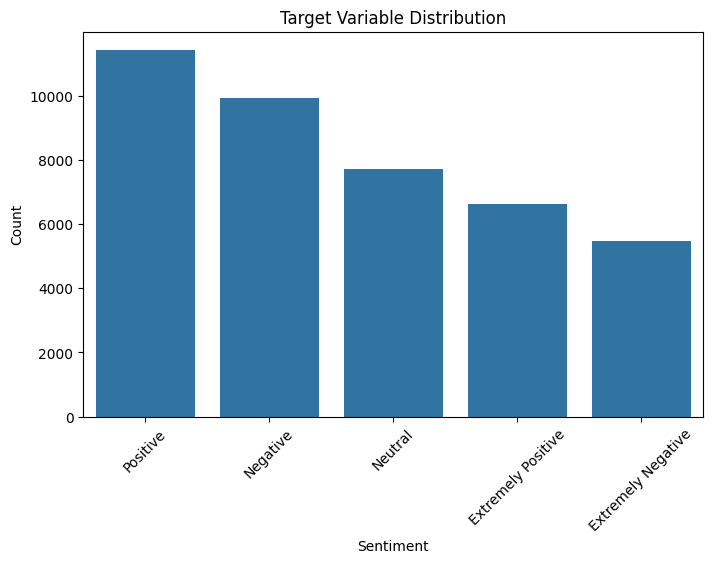

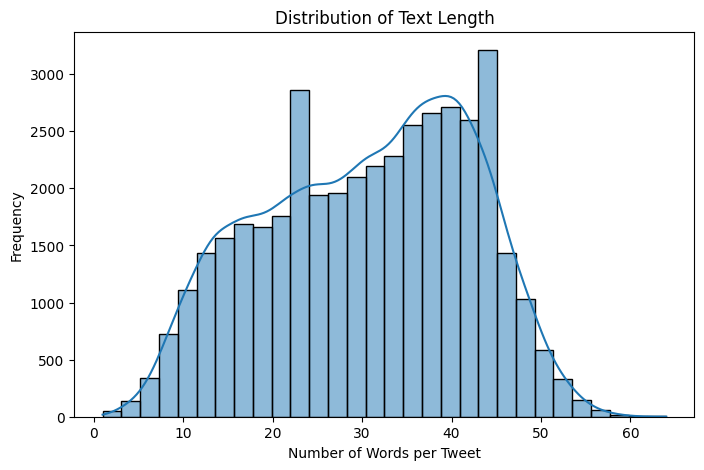

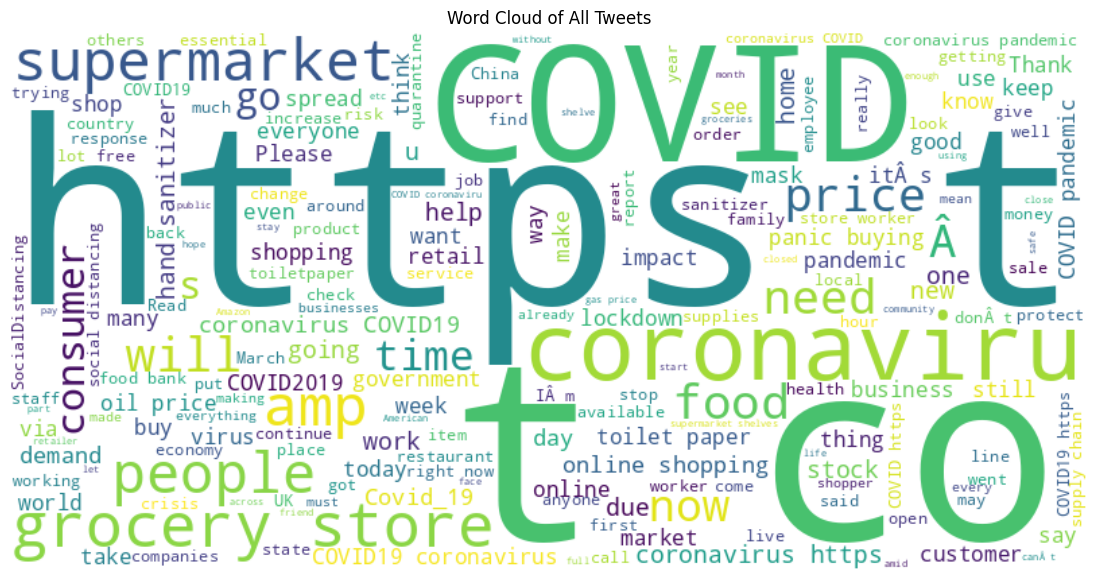

In [7]:
# Basic Data Overview
print("Data Shape:", df.shape)
print("\nData Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

# Target Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Sentiment', data=df, order=df['Sentiment'].value_counts().index)
plt.title("Target Variable Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Text Length Analysis
df['Text_Length'] = df['OriginalTweet'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8, 5))
sns.histplot(df['Text_Length'], bins=30, kde=True)
plt.title("Distribution of Text Length")
plt.xlabel("Number of Words per Tweet")
plt.ylabel("Frequency")
plt.show()

# Word Cloud
all_text = " ".join(df['OriginalTweet'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of All Tweets")
plt.show()



# Time and Location Analysis
We also tested whether sentiment changed over time, hoping to see a connection with real-world events such as lockdown announcements. While some
spikes appeared, closer inspection showed they were likely due to misclassified tweets rather than genuine shifts in public mood. Similarly, we explored
sentiment differences across geographic locations. After cleaning and grouping the data, we found no meaningful variation between regions. Both of
these experiments were valuable, even if they did not reveal strong patterns,
since they showed us where the dataset was informative and where it was
not.


<ipython-input-8-2545296877>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['TweetAt'] = pd.to_datetime(df['TweetAt'])


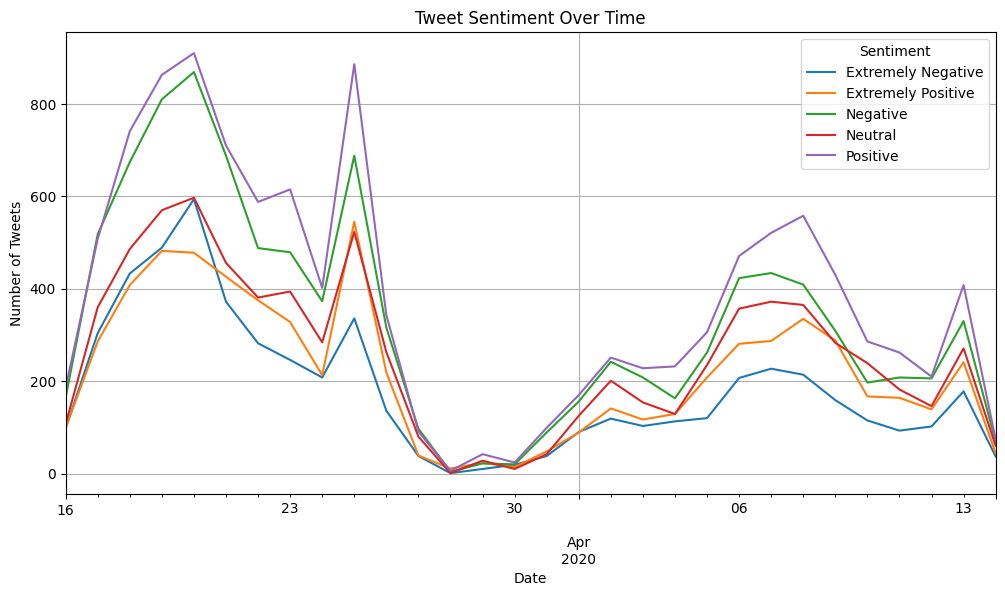

In [8]:
df['TweetAt'] = pd.to_datetime(df['TweetAt'])
# Group by date and sentiment
sentiment_counts = df.groupby(['TweetAt', 'Sentiment']).size().unstack().fillna(0)

# Plot
sentiment_counts.plot(figsize=(12, 6))
plt.title("Tweet Sentiment Over Time")
plt.ylabel("Number of Tweets")
plt.xlabel("Date")
plt.grid(True)
plt.show()

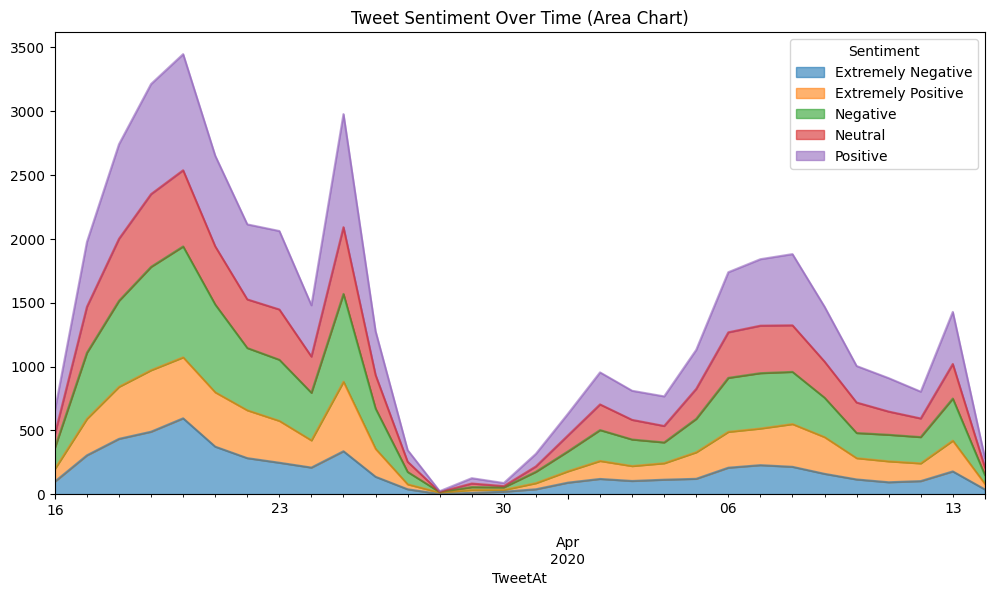

In [9]:
sentiment_counts.plot.area(figsize=(12,6), alpha=0.6)
plt.title("Tweet Sentiment Over Time (Area Chart)")
plt.show()


<Figure size 1200x600 with 0 Axes>

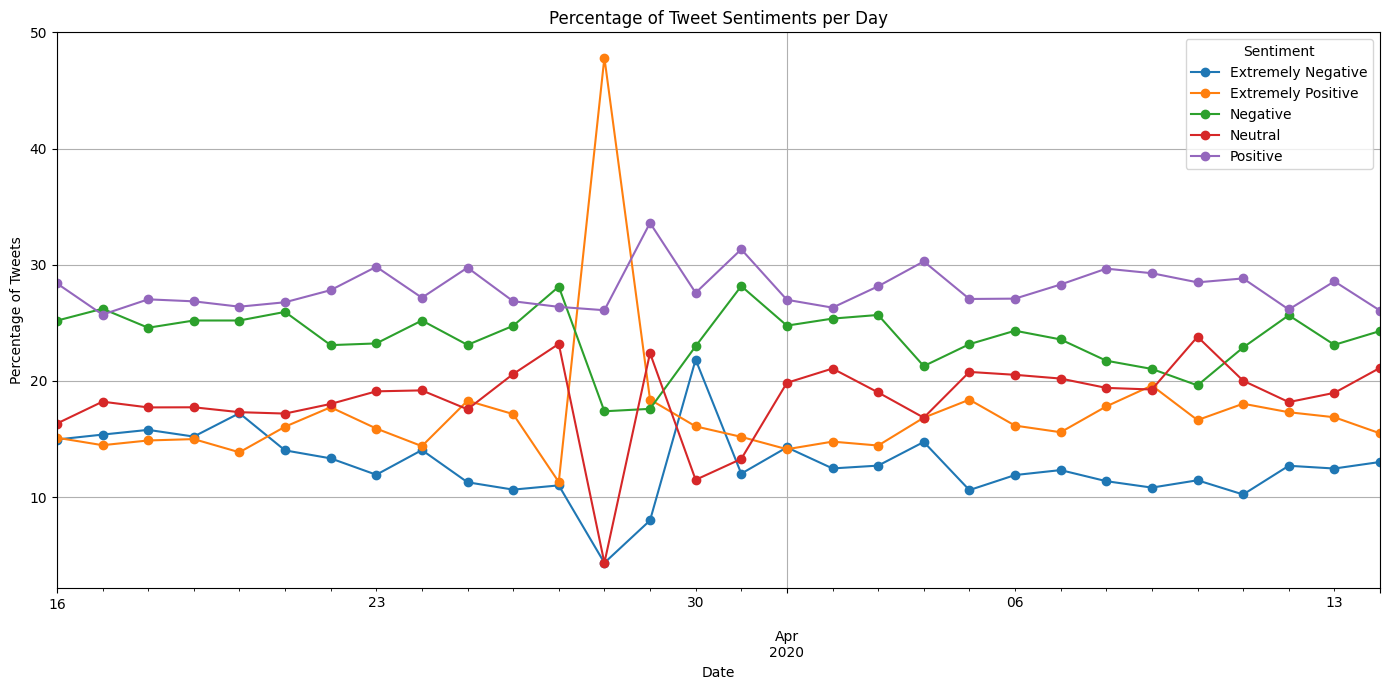

In [10]:
daily_counts = df.groupby(['TweetAt', 'Sentiment']).size().unstack().fillna(0)

# Step 2: Convert to percentage (row-wise division)
daily_percentages = daily_counts.div(daily_counts.sum(axis=1), axis=0) * 100

# Step 3: Plot
plt.figure(figsize=(12, 6))
daily_percentages.plot(kind='line', figsize=(14, 7), marker='o')
plt.title("Percentage of Tweet Sentiments per Day")
plt.xlabel("Date")
plt.ylabel("Percentage of Tweets")
plt.legend(title="Sentiment")
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
# Find the date with the highest 'Extremely Positive' sentiment
peak_date = daily_percentages['Extremely Positive'].idxmax()
peak_percentage = daily_percentages['Extremely Positive'].max()

print("Date with peak 'Extremely Positive' sentiment:", peak_date)
print("Percentage on that date:", round(peak_percentage, 2), "%")


Date with peak 'Extremely Positive' sentiment: 2020-03-28 00:00:00
Percentage on that date: 47.83 %


In [12]:
print("Date range:", df['TweetAt'].min(), "to", df['TweetAt'].max())


Date range: 2020-03-16 00:00:00 to 2020-04-14 00:00:00


In [13]:
# Filter the dataframe for the peak date
peak_day_tweets = df[df['TweetAt'] == peak_date]

# Display tweets with 'Extremely Positive' sentiment
#peak_extremely_positive = peak_day_tweets[peak_day_tweets['Sentiment'] == 'Extremely Positive']

# Show the text of those tweets
peak_day_tweets[['OriginalTweet', 'Sentiment']].head(10)  # or use .to_string(index=False) for full text


OriginalTweet  \
24948                                                     .@Woolworths is set to expand its community shopping hour amid a number of social distancing measures. The supermarket giant will now devote an hour from 7am on Tuesdays and Thursdays for emergency services and healthcare workers. https://t.co/MlW1GFkZNa #Coronavirus #7NEWS https://t.co/2HPxMWgKPO   
24949                                                                                                                                                                  @JackPosobiec Test kits with low accuracy but high prices, businessmen in the world should learn from CCP?\r\r\nMaking big money with #coronavirus made by CCP itself https://t.co/TxTXT1Yr3q   
24950                                                                    NSW, Australia.  COVID-19 positive Chinese woman caught on camera spitting on bananas at a suburban supermarket.  Is this an isolated incident or are the Chinese Nationals and Communist Party loyalists being paid and instructed to do this by their government? https://t.co/9fXVVZdGpC   
24951                                                                                                                        1 A friend is helping with relief across India wants connects to Spencer s Le Marche Modern Bazaar D mart Bigmart Retail More Nilgiris Spar Easy Day Star Bazaar Hyper City Lulu Hypermarket Vishal Mega Mart Best Price Heritage Fresh   
24952                                                                            My story about how grocery stores and their workers are continuing their vital services during the #coronavirus pandemic. Remember to be kind to supermarket workers, theyÂre working for low wages to feed you during a global crisis. ?@seacoastonline?  https://t.co/tYiG6QcOiK   
24953                                                                                                  Protected shopping with my wife during the #CoronaPandemie, thanks to @manomama's @urbandoo_online Loop.\r\r\n#StaySafe #StayHealthy ?? #SocialDistanacing #Coronavirus #COVID19 #SocialDistanacing #MaskeAuf https://t.co/CPYkbOEKvt https://t.co/xMnoN0RXJr   
24954                                                                                                                        #Coronavirus: Italy becoming impatient with lockdown - and social unrest is brewing. Police descend on a supermarket after reports people have stolen food to feed themselves, as patience turns to desperation https://t.co/YQnhqamNgs   
24955                                                                                                                                      @mundaditob @marosephine @senatrdc @VoilaNight @PresidenceRdc I can confirm it and backup this statement because before the occuring of #covid-19 and now prices are still the same. Go ahead #Shoprite you are the BEST!   
24956  So you want to limit trips to the grocery store?\r\r\nMe too!\r\r\n\r\r\nDYK: Unopened blocks of #cheese like this \r\r\nwill keep for up to 6 months in fridge.\r\r\n\r\r\nUse in quesadillas, quiche, soup, tacos - what else?\r\r\n\r\r\n#COVID19 #Covid_19 #COVIDCanada #panickbuying \r\r\n#quarantinekitchen #QuarantineCooking https://t.co/91DbaoUuWh   
24957                                                              When all this is over, IÂll never again take for granted a handshake with a stranger or a hug from a friend. I will appreciate full shelves at the supermarket &amp; pharmacy. I will be grateful for live sport &amp; appreciate the roar of the crowds in the stadiums. #coronavirus #Covid_19   

                Sentiment  
24948            Positive  
24949            Negative  
24950  Extremely Positive  
24951  Extremely Positive  
24952            Negative  
24953  Extremely Positive  
24954  Extremely Negative  
24955  Extremely Positive  
24956            Positive  
24957  Extremely Positive

fromt this we undarstand that there is nothing special in in this day only probably has less tweet and one of them seem to be labeld incorrectly

In [ ]:
# View all unique location values

def clean_location(loc):
    if pd.isnull(loc):
        return "unknown"
    loc = re.sub(r'[#*;]', '', loc)  # remove symbols
    loc = loc.strip()
    loc = loc.lower()
    
    # Remove common noise characters
    loc = re.sub(r'[$@()/|~,.]+', ' ', loc)
    if '?' in loc or not loc.isascii() or not re.search(r'[a-zA-Z]', loc):
        return "unknown"

    
    # Remove usernames (starting with $ or @ or patterns like bi, qth, etc.)
    if loc.startswith('$') or loc.startswith('@'):
        return "unknown"
    if re.search(r'\b(bi|qth|follow back|followme|deviantart)\b', loc):
        return "unknown"

    # Remove extra whitespace
    loc = re.sub(r'\s+', ' ', loc).strip()

    # Remove very short or meaningless locations
    if len(loc) < 3:
        return "unknown"

    # Keep only entries that have letters
    if not re.search(r'[a-z]', loc):
        return "unknown"

    return loc



df['Location'] = df['Location'].apply(clean_location)

# Define keywords for mapping (expand as needed)
location_keywords = {
    "usa": ["usa", "united states", "america", "us", "california", "ny", "new york", "texas", "florida", "chicago", "los angeles", "la", "washington","denver","arizona"
    "baltimore","virginia","wisconsin","alexandria","ann arbor mi","arlington","asheville","bay area","albuquerque","berkeley","grand rapids","boston","brooklyn",
"cambridge", "boise","champaign","charleston","charlotte","cincinnati","colorado","columbia","detroit","connecticut", "seattle","durham","u s a", "tucson","tampa","st louis","south carolina",
"sioux falls","silver spring","scottsdale","santa barbara","san jose","san francisco", "san diego","san antonio","sacramento", "riverside","richmond","reno","raleigh","princeton","pittsburgh","phoenix","pennsylvania","pasadena"
,'edmonton','fort worth','greenville','illinois','irvine','jacksonville','kansas','lincoln','long beach','louisville','madison','maine','memphis',
  'miami','michigan','minneapolis','nashville','new brunswick','new jersey','newcastle upon tyne','north carolina','norwich','ohio','omaha',
  'orange county'],
    "uk": ["uk", "united kingdom", "england", "london", "scotland", "wales", "manchester", "birmingham","yorkshire","bristol", "liverpool", "glasgow", "edinburgh"],
    "canada": ["canada", "toronto", "vancouver", "montreal", "ottawa", "calgary",'edmonton alberta',"amilton ontario",'kitchener ontario','mississauga ontario','ontario'],
    "australia": ["australia", "sydney", "melbourne", "brisbane", "perth"],
    "india": ["india", "delhi", "mumbai", "bangalore", "chennai", "kolkata",'hyderabad','pune'],
    "germany": ["germany", "berlin", "munich", "frankfurt", "hamburg"],
    "france": ["france", "paris", "lyon", "marseille"],
    'uae': ['uae', 'united arab emirates', 'dubai', 'abu dhabi'],
    'lebanon': ['lebanon',"beirut"],
    "brazil": ["brazil", "sao paulo", "rio de janeiro", "brazilia"],
    "south africa": ["south africa", "johannesburg", "cape town", "durban"],
    "japan": ["japan", "tokyo", "osaka", "kyoto", "yokohama"],
    "south korea": ["south korea", "seoul", "busan", "incheon", "daegu"],
    "russia": ["russia", "moscow", "st petersburg", "novosibirsk"],
    "china": ["china", "beijing", "shanghai", "guangzhou", "shenzhen"],
    "italy": ["italy", "rome", "milan", "naples", "turin","roma"],
    "spain": ["spain", "madrid", "barcelona", "valencia", "seville"],
    "netherlands": ["netherlands", "amsterdam", "rotterdam", "the hague"],
    "sweden": ["sweden", "stockholm", "gothenburg", "malmo"],
    "norway": ["norway", "oslo", "bergen", "stavanger"],
    "switzerland": ["switzerland", "zurich", "geneva", "bern", "basel"],
    "czech republic" : ["czech republic", "prague", "brno", "ostrava"],
    "nigeria" : ["nigeria", "lagos", "abuja", "port harcourt", "ibadan"],
    "argentina": ["argentina", "buenos aires", "cordoba", "rosario"],
    "mexico": ["mexico", "mexico city", "guadalajara", "monterrey"],
    "turkey": ["turkey", "istanbul", "ankara", "izmir", "bursa"],
    "zimbabwe"  : ["zimbabwe", "harare", "bulawayo", "mutare"],
    "kenya": ["kenya", "nairobi", "mombasa", "kisumu"],
    "bahrain": ["bahrain", "manama"],
    "ireland": ["ireland", "dublin", "cork", "galway", "limerick","belfast"],
    "australia": ["australia", "sydney", "melbourne", "brisbane", "perth","canberra"],
    #"fiji": ["fiji", "suva", "nadi", "lami"],
    "pakistan": ["pakistan", "karachi", "lahore", "islamabad", "peshawar"],
    "ghana" : ["ghana", "accra", "kumasi", "takoradi"],
    "unknown" : ["world", "global", "international", "earth", "planet", "worldwide", "universal", "internationally", "global citizen", "global community","everywhere","here","nowhere","sales esmmagazine com","she her","internet",'essex','fiji','jdsupra com','kent','leeds','ord','sheffield'],
    # Add more as needed
}

def map_location(loc):
    for country, keywords in location_keywords.items():
        for kw in keywords:
            if kw in loc:
                return country
    return loc  # Keep original if no match

df['Location'] = df['Location'].apply(map_location)
# Then, group rare locations (not in the mapping) as 'other'
location_counts = df['Location'].value_counts()
rare_locations = location_counts[location_counts < 10].index
df['Location'] = df['Location'].apply(lambda x: 'unknown' if (x not in location_keywords and x in rare_locations) else x)

# Check new unique values
print(df['Location'].value_counts())

unique_locations = df['Location'].dropna().unique()
print(f"Number of unique values: {len(unique_locations)}")

# Print them (optional: sorted and with line breaks)
for loc in sorted(unique_locations):
    print(loc)

Location
unknown           20768
usa               15856
india              1479
canada             1279
south africa        309
nigeria             213
france              148
uae                 140
singapore            90
pakistan             90
spain                81
china                73
ghana                53
italy                52
europe               43
hong kong            41
japan                40
sweden               36
zimbabwe             32
mexico               31
lebanon              31
turkey               28
philippines          27
africa               26
jamaica              18
uganda               17
norway               15
argentina            15
saudi arabia         14
belgium              14
brazil               13
doha qatar           13
bahrain              12
georgia              11
kuwait               11
rwanda               10
south korea          10
czech republic        4
Name: count, dtype: int64
Number of unique values: 38
africa
argentina
bahrain


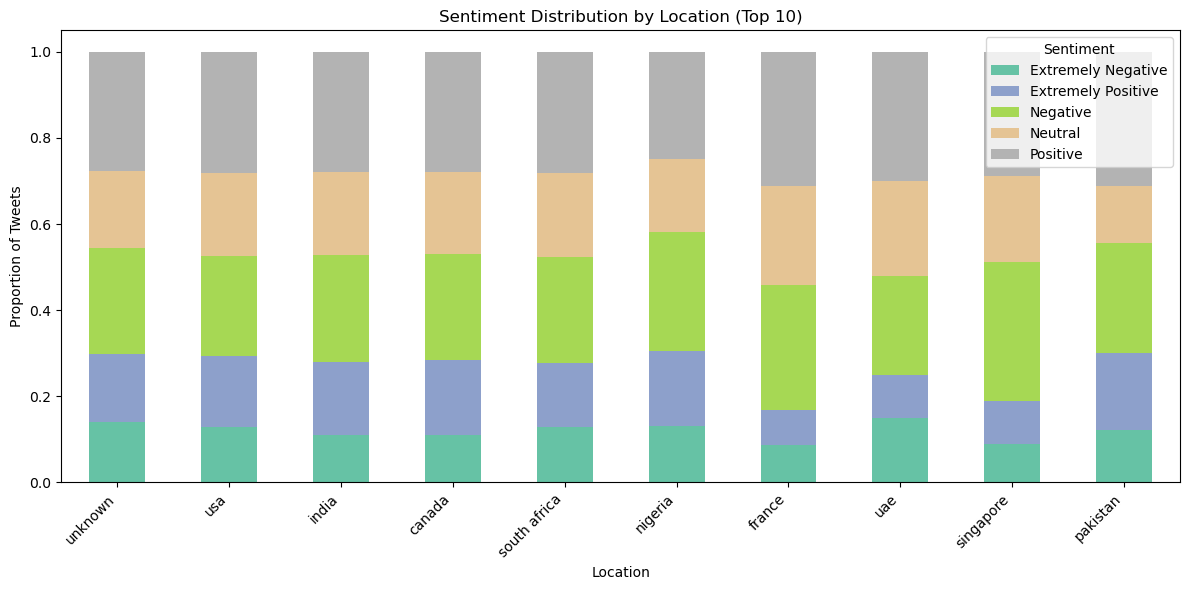

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Replace NaNs
df['Location'] = df['Location'].fillna("unknown")

# Step 2: Count sentiment per location
location_sentiment_counts = df.groupby(['Location', 'Sentiment']).size().unstack(fill_value=0)

# Step 3: Normalize to get percentages per location
location_sentiment_percent = location_sentiment_counts.div(location_sentiment_counts.sum(axis=1), axis=0)

# Optional: focus on top 10 locations with most tweets
top_locations = location_sentiment_counts.sum(axis=1).sort_values(ascending=False).head(10).index
location_sentiment_percent = location_sentiment_percent.loc[top_locations]

# Step 4: Plot
location_sentiment_percent.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')

plt.title("Sentiment Distribution by Location (Top 10)")
plt.ylabel("Proportion of Tweets")
plt.xlabel("Location")
plt.legend(title="Sentiment")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


seems like there is nothing special base on the location

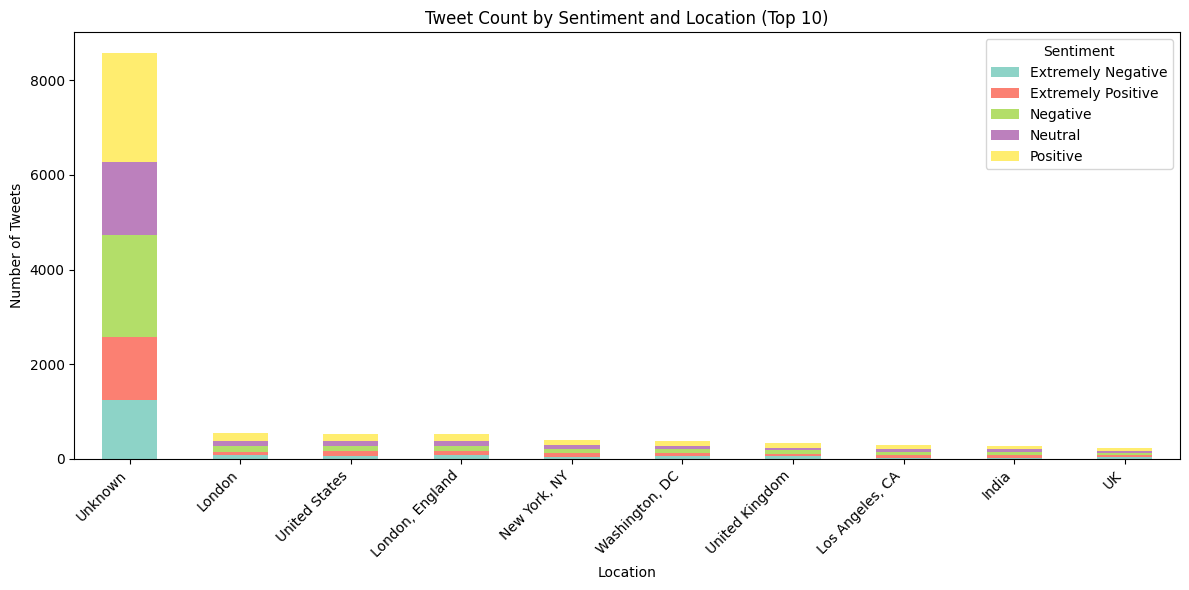

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace NaNs with 'Unknown'
df['Location'] = df['Location'].fillna("Unknown")

# Count number of tweets per sentiment per location
location_sentiment_counts = df.groupby(['Location', 'Sentiment']).size().unstack(fill_value=0)

# Optional: limit to top 10 locations with most tweets
top_locations = location_sentiment_counts.sum(axis=1).sort_values(ascending=False).head(10).index
location_sentiment_top = location_sentiment_counts.loc[top_locations]

# Plot
location_sentiment_top.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')

plt.title("Tweet Count by Sentiment and Location (Top 10)")
plt.ylabel("Number of Tweets")
plt.xlabel("Location")
plt.legend(title="Sentiment")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [16]:
# Fill missing locations
df['Location'] = df['Location'].fillna("Unknown")

# Count tweets per location
location_counts = df['Location'].value_counts().reset_index()
location_counts.columns = ['Location', 'TweetCount']

# Display the table
location_counts


Location  TweetCount
0                            Unknown        8587
1                             London         540
2                      United States         526
3                    London, England         520
4                       New York, NY         395
...                              ...         ...
12211                    Round Earth           1
12212                 Uganda Kampala           1
12213  Views don't reflect employers           1
12214                  Charlotte, MI           1
12215   i love you so much || he/him           1

[12216 rows x 2 columns]

In [17]:
df[df["Location"] == "i love you so much || he/him"]


UserName  ScreenName                      Location    TweetAt  \
41156     44955       89907  i love you so much || he/him 2020-04-14   

                                                                                                                                                                                                                                                         OriginalTweet  \
41156  @TartiiCat Well new/used Rift S are going for $700.00 on Amazon rn although the normal market price is usually $400.00 . Prices are really crazy right now for vr headsets since HL Alex was announced and it's only been worse with COVID-19. Up to you whethe   

      Sentiment  \
41156  Negative   

                                                                                                                                                                                                                                                 CleanTweet  \
41156  Well new/used Rift S are going for $700.00 on Amazon rn although the normal market price is usually $400.00 . Prices are really crazy right now for vr headsets since HL Alex was announced and it's only been worse with COVID-19. Up to you whethe   

       Text_Length  
41156           46

# Tweet Length and Label Distribution
Next, we looked at the distribution of tweet lengths. We expected that
stronger emotions might lead to longer tweets, while neutral tweets might be
shorter. The results partly confirmed this: neutral tweets were indeed shorter
on average, but positive and negative tweets had similar lengths. This insight
guided our choice of input size for the model. We also examined the balance
of sentiment categories. The dataset was fairly balanced, with only slightly
fewer examples of the extreme categories. This gave us confidence that the
model would not be overly biased toward a single sentiment class. 

Data Shape: (41143, 7)

Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 41143 entries, 0 to 41156
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41143 non-null  int64 
 1   ScreenName     41143 non-null  int64 
 2   Location       41143 non-null  object
 3   TweetAt        41143 non-null  object
 4   OriginalTweet  41143 non-null  object
 5   Sentiment      41143 non-null  object
 6   CleanTweet     41143 non-null  object
dtypes: int64(2), object(5)
memory usage: 2.5+ MB
None

Missing Values:
UserName         0
ScreenName       0
Location         0
TweetAt          0
OriginalTweet    0
Sentiment        0
CleanTweet       0
dtype: int64


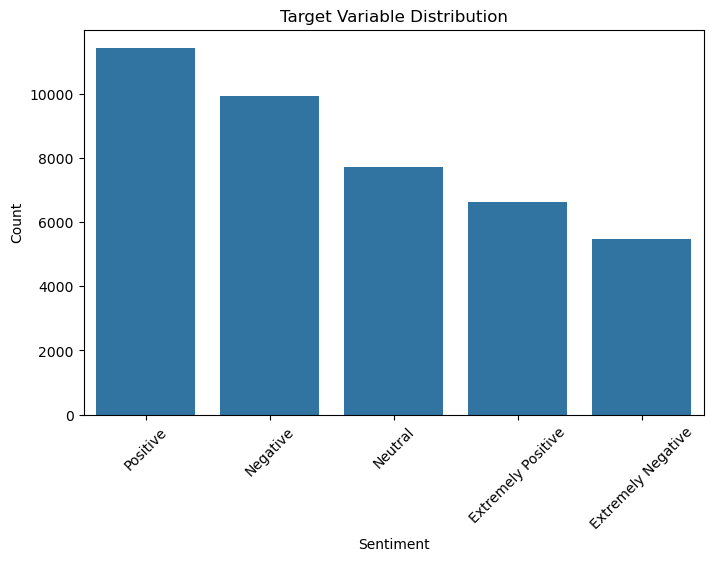

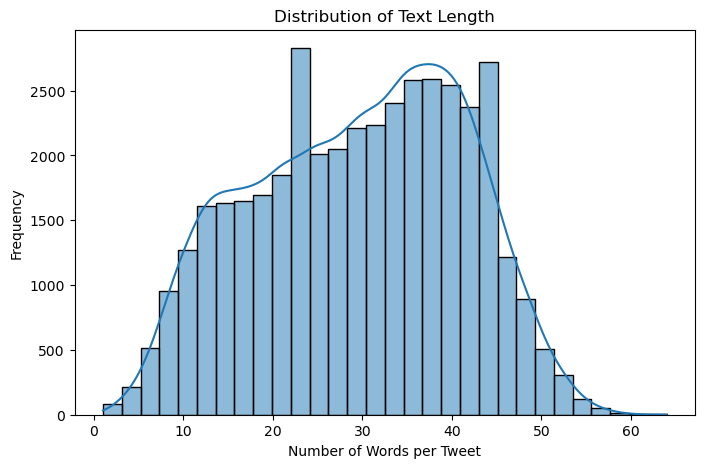

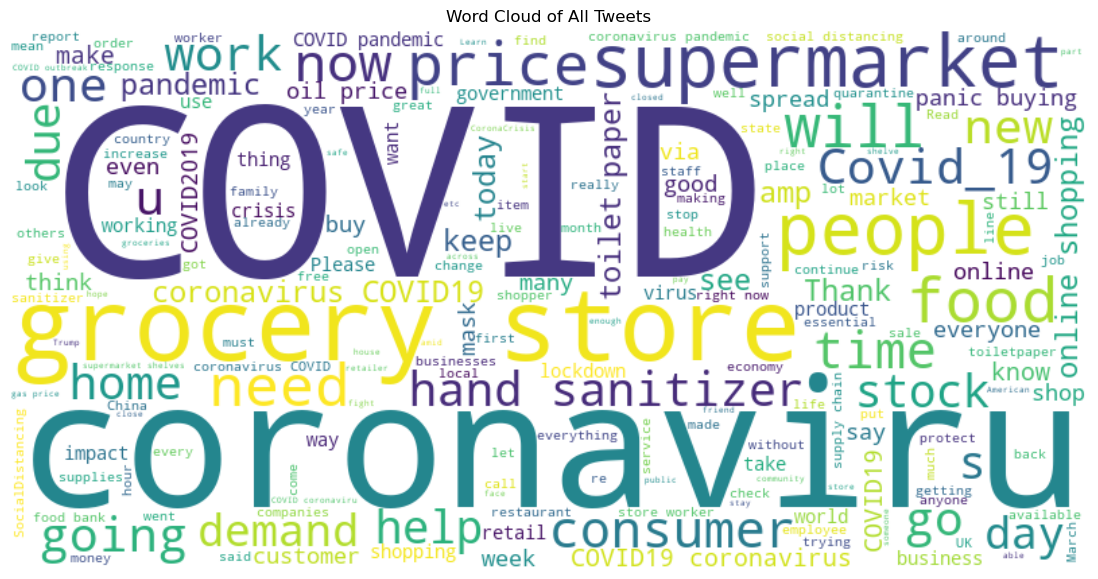

In [49]:
# Basic Data Overview for the clean tweets
print("Data Shape:", df.shape)
print("\nData Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

# Target Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Sentiment', data=df, order=df['Sentiment'].value_counts().index)
plt.title("Target Variable Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Text Length Analysis
df['Text_Length'] = df['CleanTweet'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8, 5))
sns.histplot(df['Text_Length'], bins=30, kde=True)
plt.title("Distribution of Text Length")
plt.xlabel("Number of Words per Tweet")
plt.ylabel("Frequency")
plt.show()

# Word Cloud
all_text = " ".join(df['CleanTweet'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of All Tweets")
plt.show()

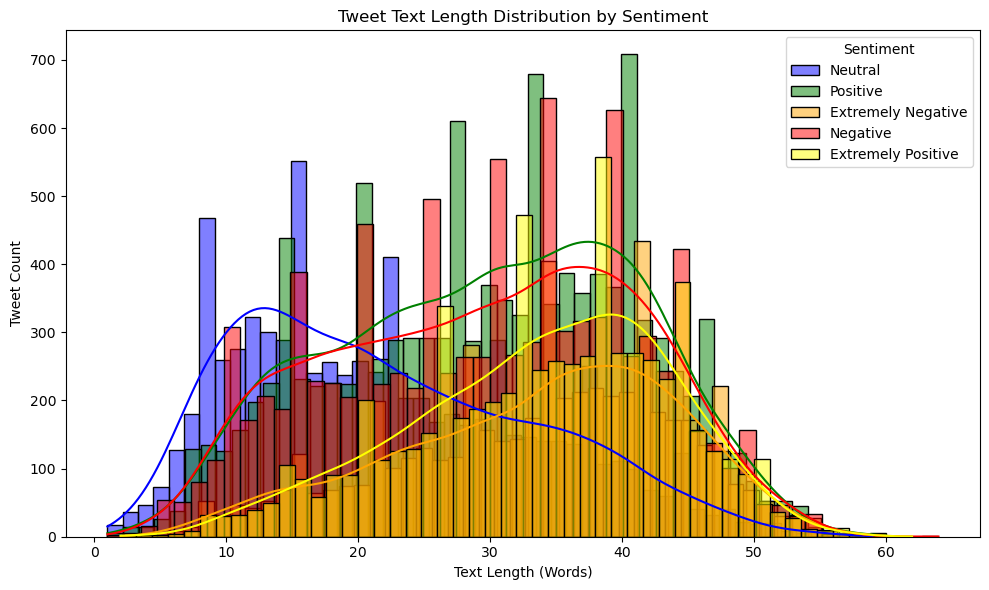

In [ ]:

#distribution of text length by sentiment
# Compute text length
df['text_length'] = df['CleanTweet'].apply(lambda x: len(str(x).split()))

# Plot
plt.figure(figsize=(10, 6))

# Plot each sentiment manually
sentiments = df['Sentiment'].unique()
colors = ['blue', 'green', 'orange',"red","yellow"]

for sentiment, color in zip(sentiments, colors):
    sns.histplot(
        df[df['Sentiment'] == sentiment]['text_length'],
        bins=50,
        kde=True,
        color=color,
        label=sentiment,
        stat='count',
        alpha=0.5
    )

# Add legend manually 
plt.legend(title='Sentiment')
plt.title('Tweet Text Length Distribution by Sentiment')
plt.xlabel('Text Length (Words)')
plt.ylabel('Tweet Count')
plt.tight_layout()
plt.show()


# check each sentiment 
We then created word clouds for each sentiment category. These helped
confirm that the labels aligned with intuition: for example, negative tweets
often mentioned panic or toilet paper, while positive tweets mentioned hand
2
sanitizer. This gave us a quick visual sense of the themes associated with
different emotions.

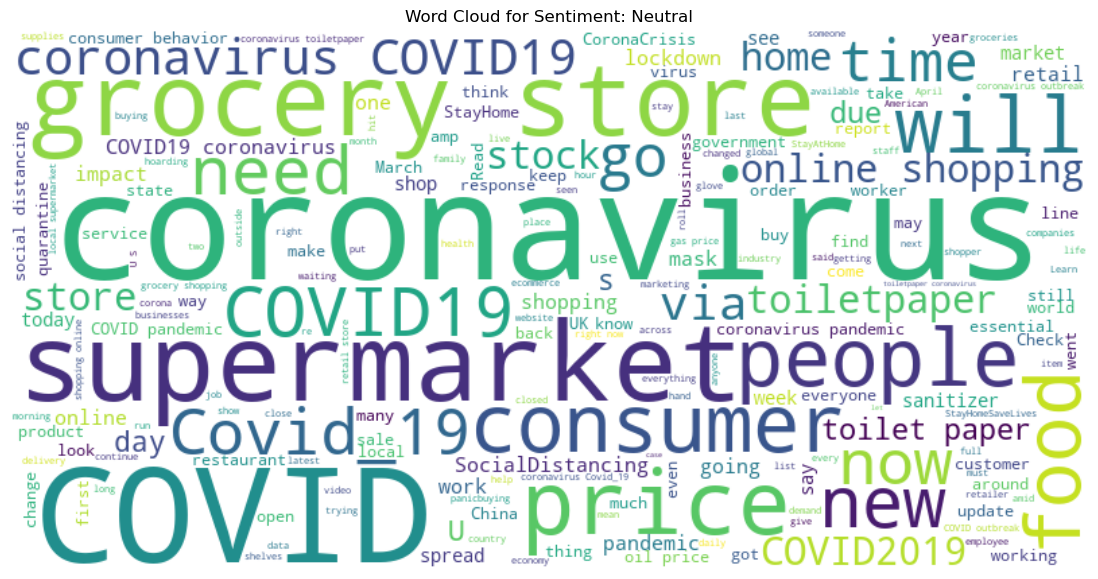

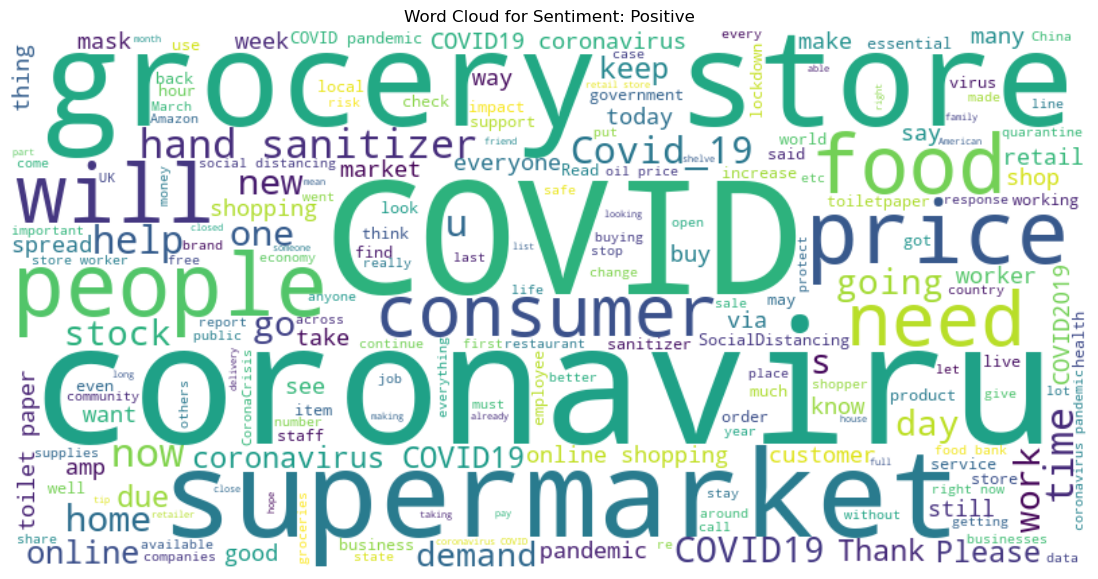

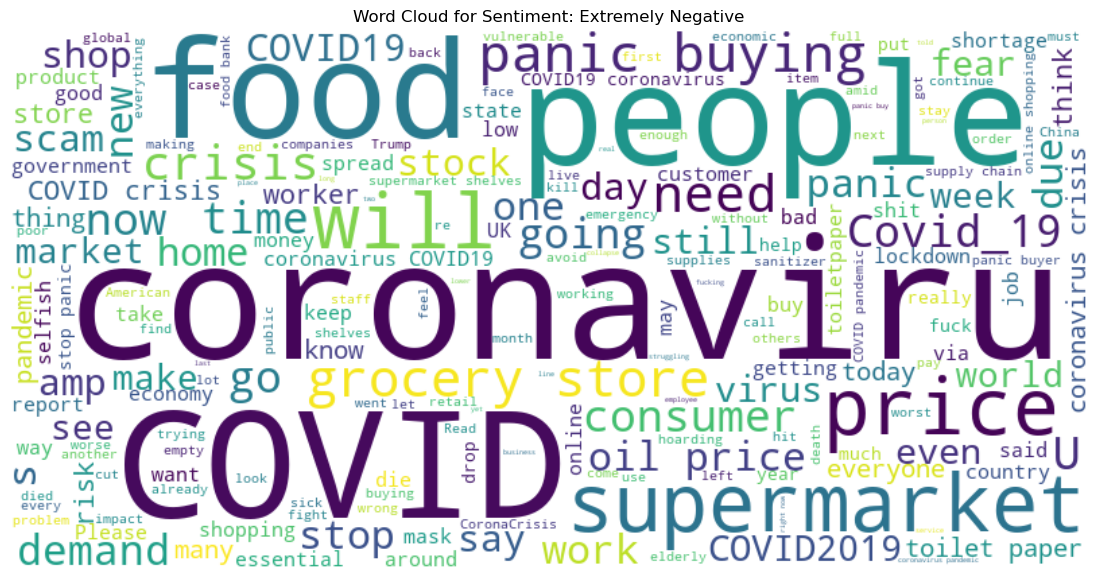

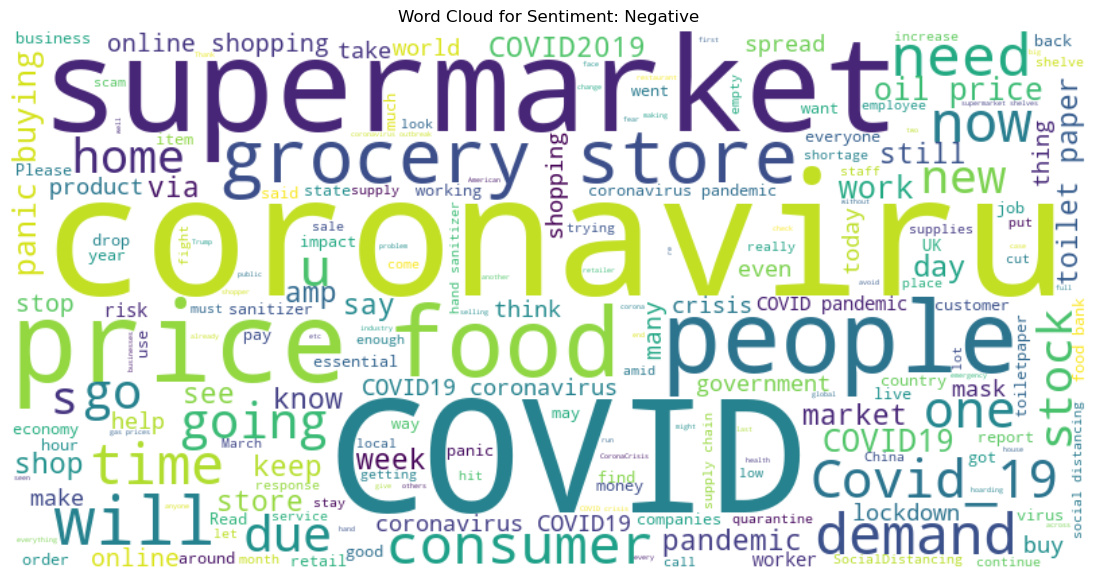

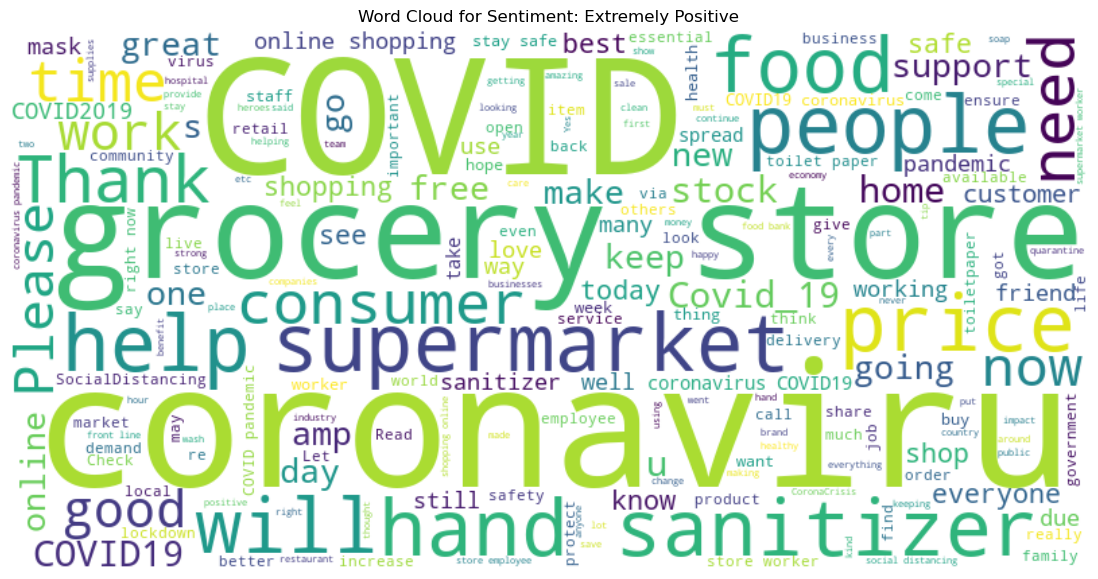

In [ ]:
# Word Cloud for each sentiment
for sen in sentiments:
    all_text = " ".join(df[df['Sentiment'] == sen]['CleanTweet'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

    plt.figure(figsize=(15, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Sentiment: {sen}")
    plt.show()


nutral tweet tend to be shorter while the one with sentiment is somhow the same.

# create the file with the clean tweets that will be fed to the model

In [5]:
df_test = pd.read_csv("Corona_NLP_test.csv", encoding='ISO-8859-1')
df_test

UserName  ScreenName             Location     TweetAt  \
0            1       44953                  NYC  02-03-2020   
1            2       44954          Seattle, WA  02-03-2020   
2            3       44955                  NaN  02-03-2020   
3            4       44956          Chicagoland  02-03-2020   
4            5       44957  Melbourne, Victoria  03-03-2020   
...        ...         ...                  ...         ...   
3793      3794       48746            Israel ??  16-03-2020   
3794      3795       48747       Farmington, NM  16-03-2020   
3795      3796       48748        Haverford, PA  16-03-2020   
3796      3797       48749                  NaN  16-03-2020   
3797      3798       48750  Arlington, Virginia  16-03-2020   

                                                                                                                                                                                                                                                                                                                                      OriginalTweet  \
0                                                                                                              TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr76pcrLWh https://t.co/ivMKMsqdT1   
1                                                                                                                                                 When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how  #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY   
2                                                                                                                                                                                                                                                                         Find out how you can protect yourself and loved ones from #coronavirus. ?   
3     #Panic buying hits #NewYork City as anxious shoppers stock up on food&amp;medical supplies after #healthcare worker in her 30s becomes #BigApple 1st confirmed #coronavirus patient OR a #Bloomberg staged event?\r\r\n\r\r\nhttps://t.co/IASiReGPC4\r\r\n\r\r\n#QAnon #QAnon2018 #QAnon2020 \r\r\n#Election2020 #CDC https://t.co/29isZOewxu   
4                                                                                      #toiletpaper #dunnypaper #coronavirus #coronavirusaustralia #CoronaVirusUpdate #Covid_19 #9News  #Corvid19 #7NewsMelb #dunnypapergate #Costco    One week everyone buying baby milk powder the next everyone buying up toilet paper. https://t.co/ScZryVvsIh   
...                                                                                                                                                                                                                                                                                                                                             ...   
3793                                                                                                                                                                                                                Meanwhile In A Supermarket in Israel -- People dance and sing together to stay positive. ? #CoronaVirus https://t.co/VLLqGI3R16   
3794                                                                                                                          Did you panic buy a lot of non-perishable items? ECHO needs food donations. It is also looking for volunteers to pack boxes. Volunteers will be screened to be sure they don't have COVID-19. https://t.co/TST4Vjhbu4   
3795                                                                                                                                                      Asst Pro

In [10]:

df_test['CleanTweet'] = df_test['OriginalTweet'].apply(clean_text)
df_test = df_test[df_test['CleanTweet'].str.strip() != '']
df_test['sentiment'] = df_test['Sentiment'].map(label2id)

df_test


UserName  ScreenName             Location     TweetAt  \
0            1       44953                  NYC  02-03-2020   
1            2       44954          Seattle, WA  02-03-2020   
2            3       44955                  NaN  02-03-2020   
3            4       44956          Chicagoland  02-03-2020   
4            5       44957  Melbourne, Victoria  03-03-2020   
...        ...         ...                  ...         ...   
3793      3794       48746            Israel ??  16-03-2020   
3794      3795       48747       Farmington, NM  16-03-2020   
3795      3796       48748        Haverford, PA  16-03-2020   
3796      3797       48749                  NaN  16-03-2020   
3797      3798       48750  Arlington, Virginia  16-03-2020   

                                                                                                                                                                                                                                                                                                                                      OriginalTweet  \
0                                                                                                              TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr76pcrLWh https://t.co/ivMKMsqdT1   
1                                                                                                                                                 When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how  #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY   
2                                                                                                                                                                                                                                                                         Find out how you can protect yourself and loved ones from #coronavirus. ?   
3     #Panic buying hits #NewYork City as anxious shoppers stock up on food&amp;medical supplies after #healthcare worker in her 30s becomes #BigApple 1st confirmed #coronavirus patient OR a #Bloomberg staged event?\r\r\n\r\r\nhttps://t.co/IASiReGPC4\r\r\n\r\r\n#QAnon #QAnon2018 #QAnon2020 \r\r\n#Election2020 #CDC https://t.co/29isZOewxu   
4                                                                                      #toiletpaper #dunnypaper #coronavirus #coronavirusaustralia #CoronaVirusUpdate #Covid_19 #9News  #Corvid19 #7NewsMelb #dunnypapergate #Costco    One week everyone buying baby milk powder the next everyone buying up toilet paper. https://t.co/ScZryVvsIh   
...                                                                                                                                                                                                                                                                                                                                             ...   
3793                                                                                                                                                                                                                Meanwhile In A Supermarket in Israel -- People dance and sing together to stay positive. ? #CoronaVirus https://t.co/VLLqGI3R16   
3794                                                                                                                          Did you panic buy a lot of non-perishable items? ECHO needs food donations. It is also looking for volunteers to pack boxes. Volunteers will be screened to be sure they don't have COVID-19. https://t.co/TST4Vjhbu4   
3795                                                                                                                                                      Asst Pro

In [11]:
df_test = df_test[['CleanTweet', 'sentiment']]
df_test.to_csv("clean_tweets_test.csv", index=False)

In [53]:
df.to_csv("clean_tweets.csv", index=False)

# Label Quality Issues
While exploring the dataset, we identified several examples where the original
labels did not align with the actual sentiment expressed in the tweets. For
instance:
“NSW, Australia. COVID-19 positive Chinese woman caught on camera spitting on bananas at a suburban supermarket. Is this an isolated
incident or are the Chinese Nationals and Communist Party loyalists
being paid and instructed to do this by their government?” Original
Label: Extremely Positive
This tweet clearly conveys negative sentiment, including fear and suspicion, yet it was labeled as “Extremely Positive.”
Another case shows the opposite pattern:
“So you want to limit trips to the grocery store? Me too! DYK:
Unopened blocks of #cheese like this will keep for up to 6 months in
fridge. Use in quesadillas, quiche, soup, tacos - what else?” Original
Label: Positive
Although this tweet is informative and largely neutral in tone (with a
mildly positive framing), it was labeled as “Positive.” In practice, it reads
closer to neutral or mixed sentiment rather than clearly positive.
Such examples highlight the presence of label noise in the dataset. Noisy
or inconsistent labeling can confuse models during training, lower evaluation
scores, and make it harder to interpret results. Even though the dataset
appears balanced across sentiment categories, its reliability is limited by
these misclassifications. Addressing this issue—through manual review, semisupervised relabeling, or noise-robust training methods—remains an important direction for future improvement.